In [3]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visuals
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [6]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
df.info()
print("\nshape of dataset:",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

shape of dataset: (8807, 12)


In [14]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

director      2634
country        831
cast           825
date_added      10
rating           4
duration         3
dtype: int64

In [17]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Example: fill missing 'rating' with 'Unknown'
df['rating'].fillna('Unknown', inplace=True)

# Drop rows with missing 'country' or 'date_added' if necessary
df.dropna(subset=['country', 'date_added'], inplace=True)

print("After cleaning, dataset shape:", df.shape)


After cleaning, dataset shape: (7967, 12)


C:\Users\HP\AppData\Local\Temp\ipykernel_19460\1488231771.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna('Unknown', inplace=True)


In [29]:

# Remove extra spaces in column names
df.columns = df.columns.str.strip()

# Remove extra spaces in string fields
df['date_added'] = df['date_added'].astype(str).str.strip()

# Convert 'date_added' to datetime safely
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', format='mixed')

# Extract year for trend analysis
df['year_added'] = df['date_added'].dt.year

# Check the result
df[['date_added', 'year_added']].head(10)


,date_added,year_added
0,2021-09-25,2021
1,2021-09-24,2021
4,2021-09-24,2021
7,2021-09-24,2021
8,2021-09-24,2021
9,2021-09-24,2021
12,2021-09-23,2021
15,2021-09-22,2021
17,2021-09-22,2021
21,2021-09-22,2021


C:\Users\HP\AppData\Local\Temp\ipykernel_19460\2333173386.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='pastel')


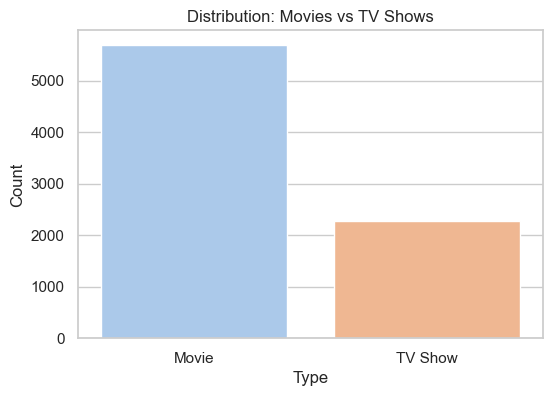

type
Movie      5691
TV Show    2276
Name: count, dtype: int64

In [30]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='pastel')
plt.title('Distribution: Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

type_counts


C:\Users\HP\AppData\Local\Temp\ipykernel_19460\2463719236.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='mako')


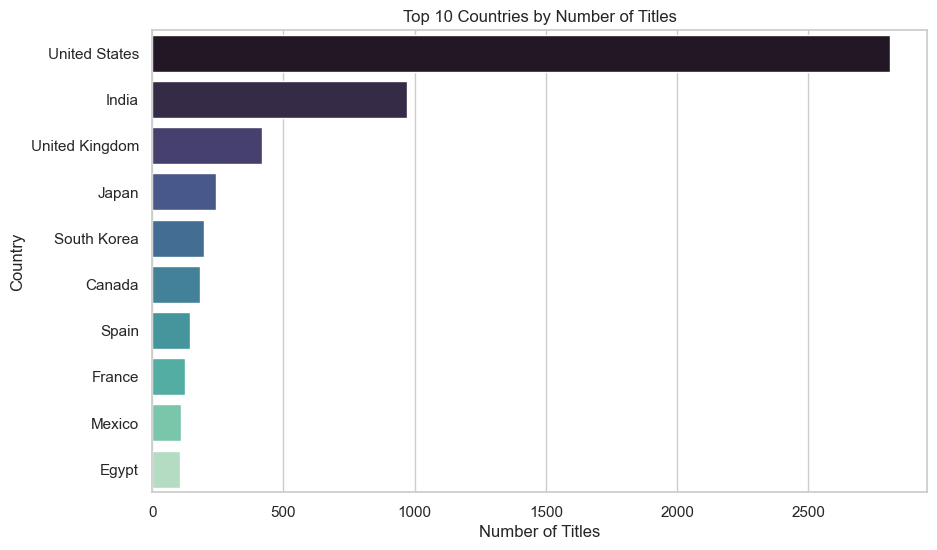

In [31]:
top_countries = df['country'].value_counts().head(10)

sns.barplot(y=top_countries.index, x=top_countries.values, palette='mako')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


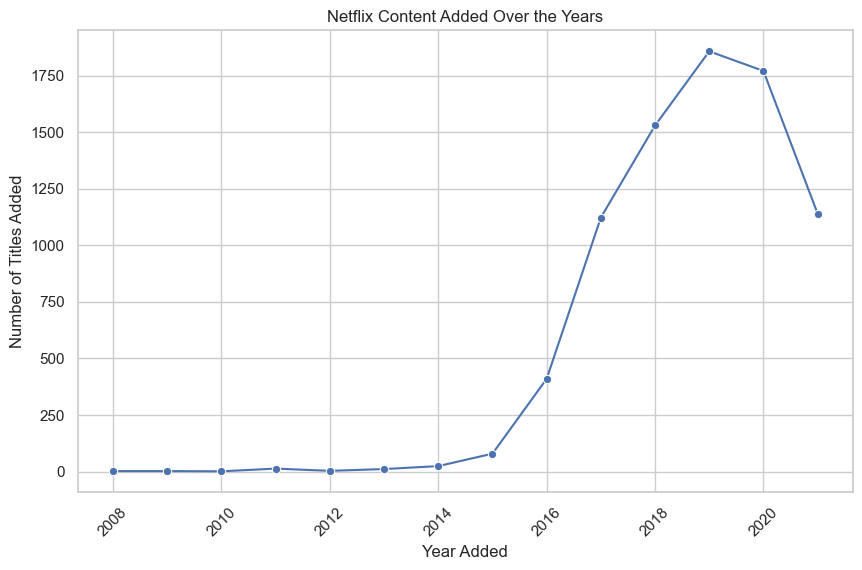

In [33]:

# Drop NaN values in 'year_added' to avoid plotting issues
content_by_year = df['year_added'].dropna().value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=content_by_year.index, y=content_by_year.values, marker='o')
plt.title('Netflix Content Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_19460\886201397.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


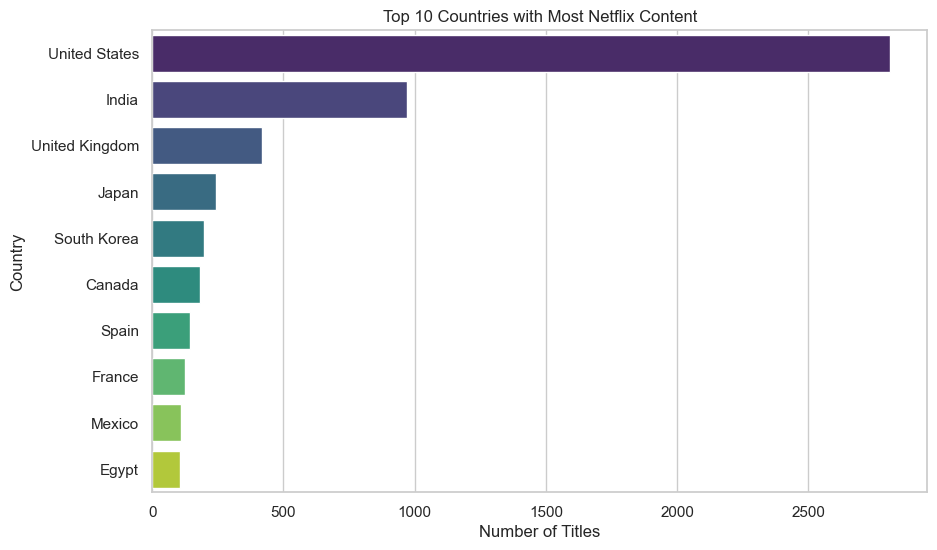

In [40]:

top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


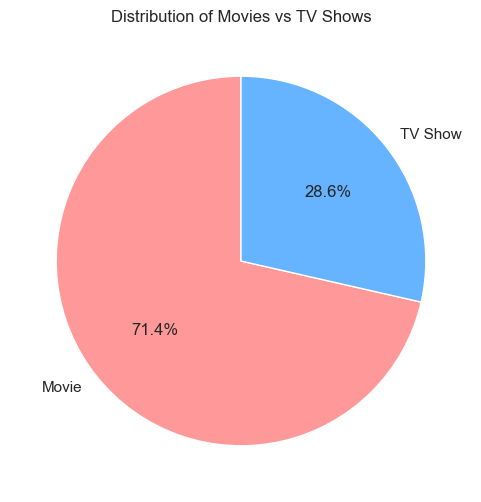

In [42]:

content_type = df['type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(content_type, labels=content_type.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Movies vs TV Shows')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_19460\3283553192.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings.index, y=ratings.values, palette='coolwarm')


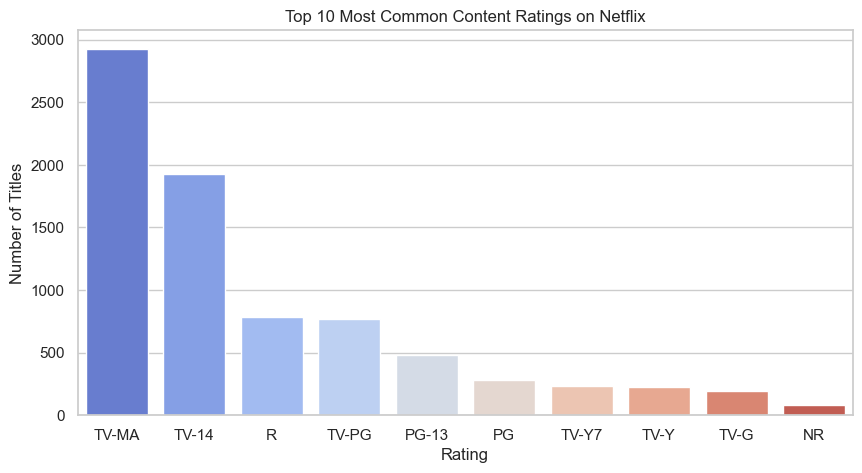

In [43]:

ratings = df['rating'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=ratings.index, y=ratings.values, palette='coolwarm')
plt.title('Top 10 Most Common Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_19460\1937618383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.replace(' min', '', regex=False).astype(float)


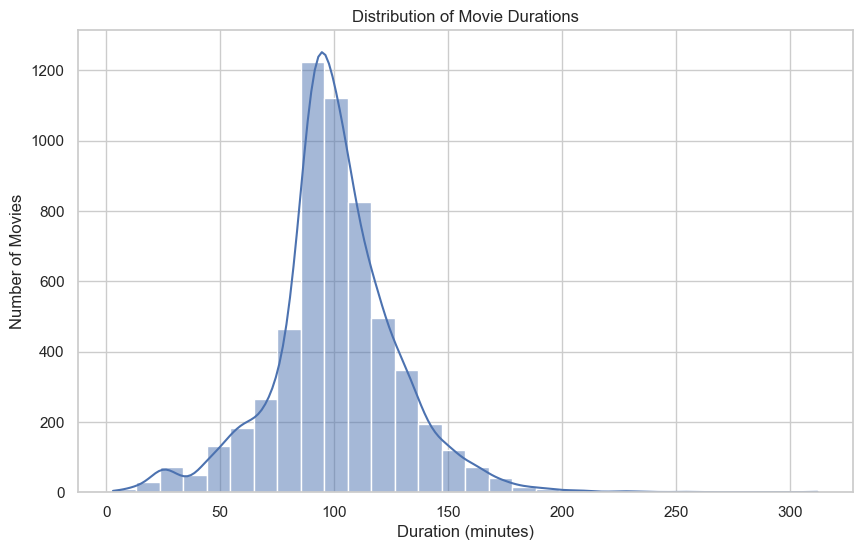

In [44]:

# Filter only movies
movies = df[df['type'] == 'Movie']

# Remove 'min' and convert to numeric
movies['duration'] = movies['duration'].str.replace(' min', '', regex=False).astype(float)

plt.figure(figsize=(10,6))
sns.histplot(movies['duration'], bins=30, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_19460\1163632538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['seasons'] = tv_shows['duration'].str.replace(' Season', '', regex=False).str.replace('s', '', regex=False).astype(int)
C:\Users\HP\AppData\Local\Temp\ipykernel_19460\1163632538.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='seasons', data=tv_shows, palette='magma')


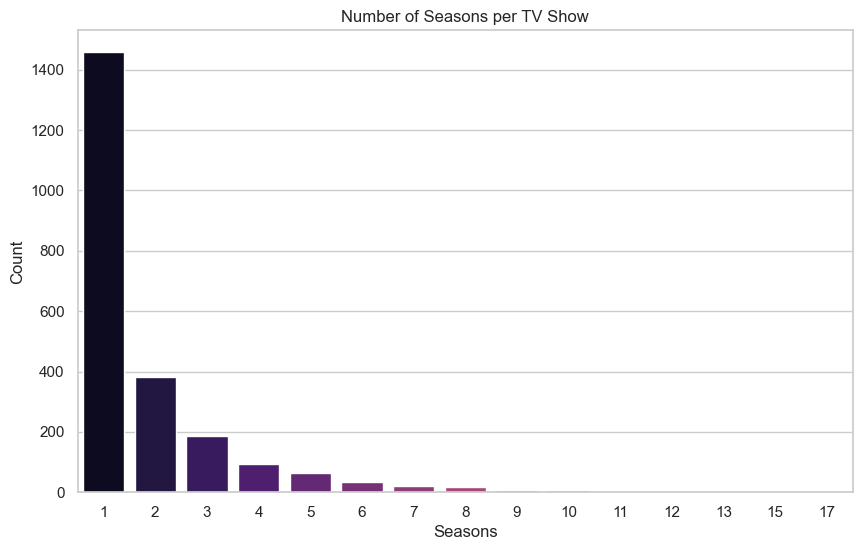

In [46]:

tv_shows = df[df['type'] == 'TV Show']
tv_shows['seasons'] = tv_shows['duration'].str.replace(' Season', '', regex=False).str.replace('s', '', regex=False).astype(int)

plt.figure(figsize=(10,6))
sns.countplot(x='seasons', data=tv_shows, palette='magma')
plt.title('Number of Seasons per TV Show')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_19460\240351806.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='crest')


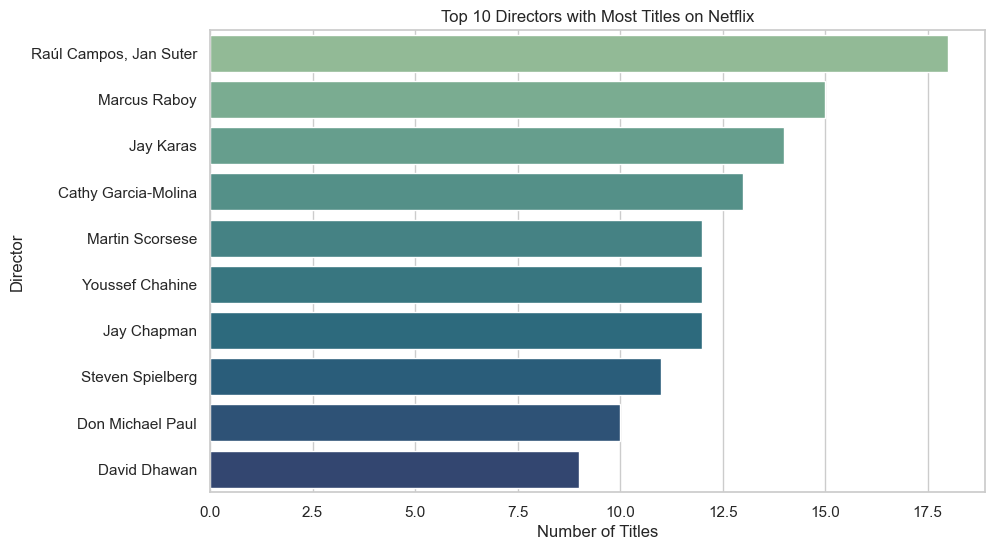

In [47]:

top_directors = df['director'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='crest')
plt.title('Top 10 Directors with Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_19460\3129186239.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='cool')


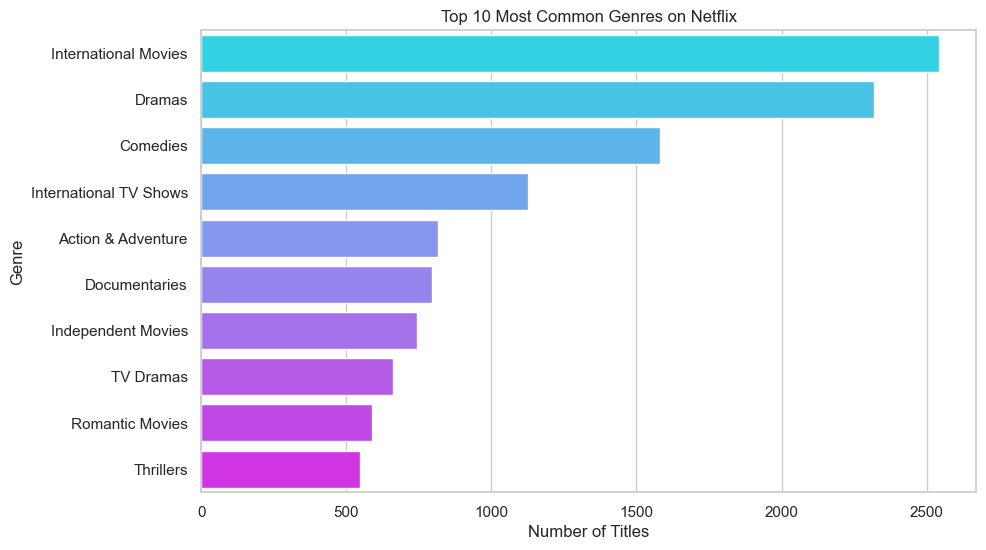

In [64]:
# Cell 18: Analyzing most common genres/categories

from collections import Counter  # ✅ Add this line to fix the error

genres = df['listed_in'].dropna().str.split(', ')
genres = [g.strip() for sublist in genres for g in sublist]
top_genres = pd.Series(Counter(genres)).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='cool')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


<Figure size 1000x600 with 0 Axes>

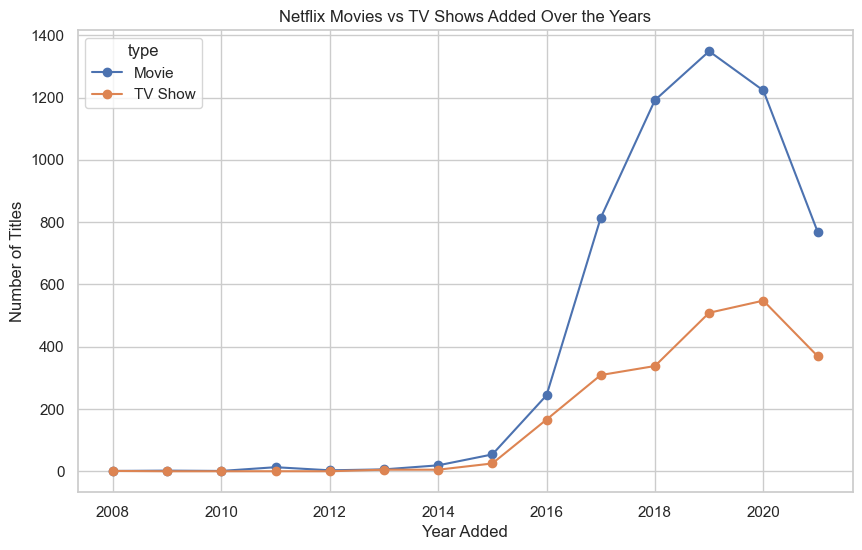

In [50]:

content_trend = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)

plt.figure(figsize=(10,6))
content_trend.plot(kind='line', marker='o')
plt.title('Netflix Movies vs TV Shows Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


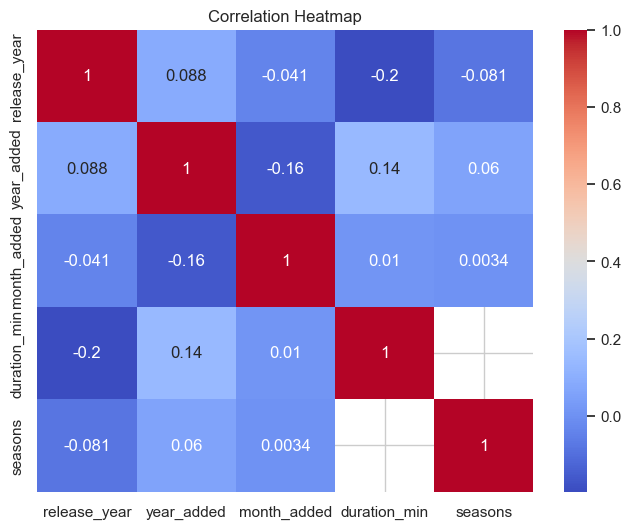

In [52]:

# Only include numeric columns
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [53]:

print("🔍 Netflix Dataset Insights Summary\n")
print("1️⃣ Most Netflix content comes from the United States, followed by India and the UK.")
print("2️⃣ Movies make up the majority of the catalog (~70%), while TV Shows account for the rest.")
print("3️⃣ The most common content ratings are 'TV-MA' and 'TV-14', indicating a large amount of mature content.")
print("4️⃣ Most movies have durations between 80–120 minutes.")
print("5️⃣ Most TV Shows have 1 or 2 seasons, meaning Netflix tends to produce short series.")
print("6️⃣ Directors such as Raúl Campos and Jan Suter appear frequently in the catalog.")
print("7️⃣ Actor Anupam Kher and Shah Rukh Khan appear among the top featured actors.")
print("8️⃣ The top genres are 'International Movies', 'Dramas', and 'Comedies'.")
print("9️⃣ A steady increase in content was observed from 2015 to 2020 before slightly slowing down.")
print("✅ Overall: Netflix's catalog leans heavily toward international movies and short TV shows.")


🔍 Netflix Dataset Insights Summary

1️⃣ Most Netflix content comes from the United States, followed by India and the UK.
2️⃣ Movies make up the majority of the catalog (~70%), while TV Shows account for the rest.
3️⃣ The most common content ratings are 'TV-MA' and 'TV-14', indicating a large amount of mature content.
4️⃣ Most movies have durations between 80–120 minutes.
5️⃣ Most TV Shows have 1 or 2 seasons, meaning Netflix tends to produce short series.
6️⃣ Directors such as Raúl Campos and Jan Suter appear frequently in the catalog.
7️⃣ Actor Anupam Kher and Shah Rukh Khan appear among the top featured actors.
8️⃣ The top genres are 'International Movies', 'Dramas', and 'Comedies'.
9️⃣ A steady increase in content was observed from 2015 to 2020 before slightly slowing down.
✅ Overall: Netflix's catalog leans heavily toward international movies and short TV shows.


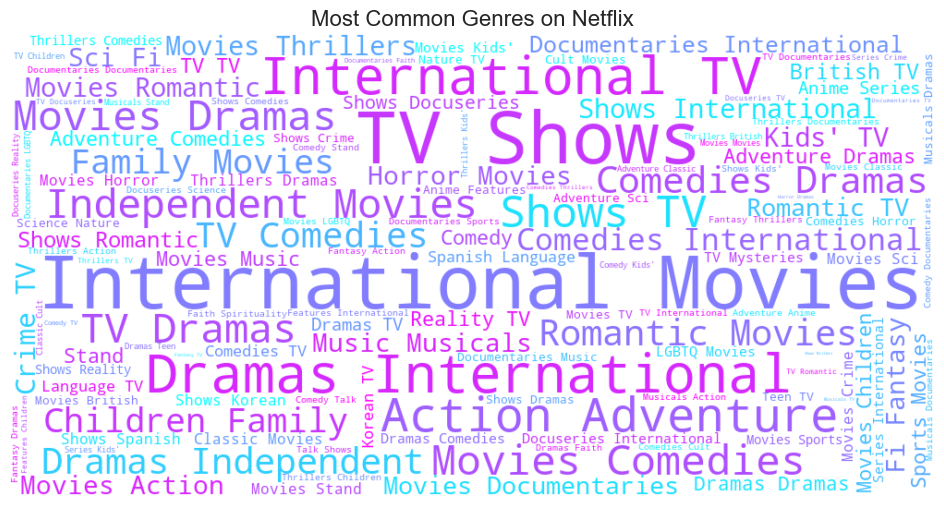

In [66]:

from wordcloud import WordCloud

genre_text = ' '.join(df['listed_in'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='cool').generate(genre_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Genres on Netflix', fontsize=16)
plt.show()


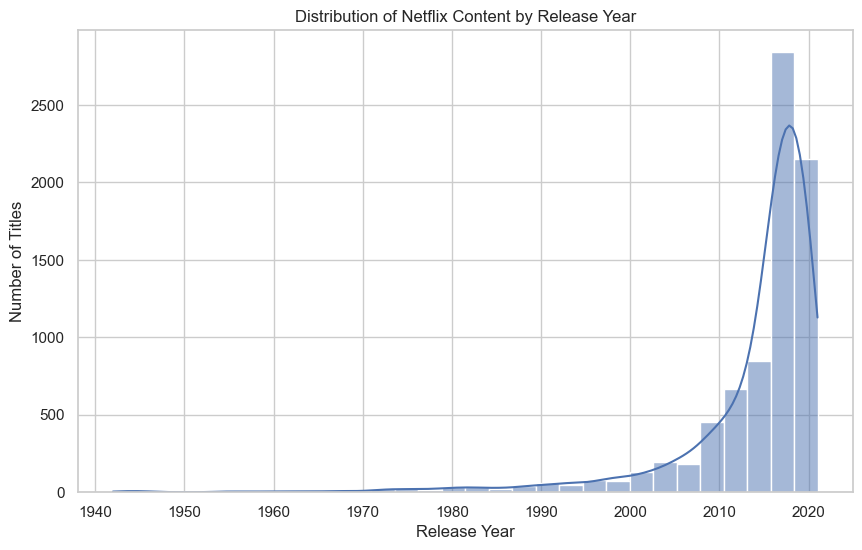

In [56]:

plt.figure(figsize=(10,6))
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title('Distribution of Netflix Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_19460\3765454882.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.values, y=top_words.index, palette='plasma')


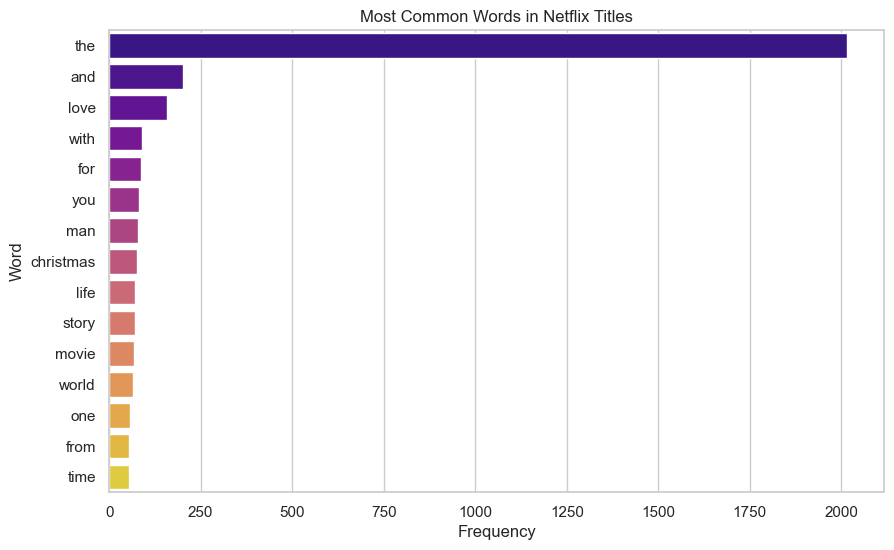

In [57]:

from collections import Counter
import re

titles = df['title'].dropna().str.lower()
words = [word for title in titles for word in re.findall(r'\b[a-z]{3,}\b', title)]  # words with 3+ letters
top_words = pd.Series(Counter(words)).sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_words.values, y=top_words.index, palette='plasma')
plt.title('Most Common Words in Netflix Titles')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


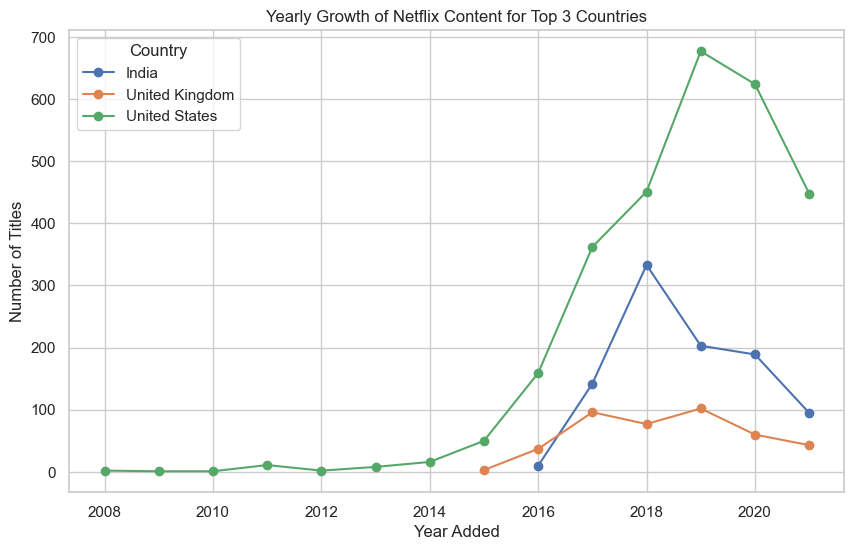

In [58]:

top_3_countries = df['country'].value_counts().head(3).index
country_trend = df[df['country'].isin(top_3_countries)].groupby(['year_added', 'country']).size().unstack()

country_trend.plot(kind='line', figsize=(10,6), marker='o')
plt.title('Yearly Growth of Netflix Content for Top 3 Countries')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Country')
plt.grid(True)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_19460\2724698666.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_duration.values, y=avg_duration.index, palette='viridis')


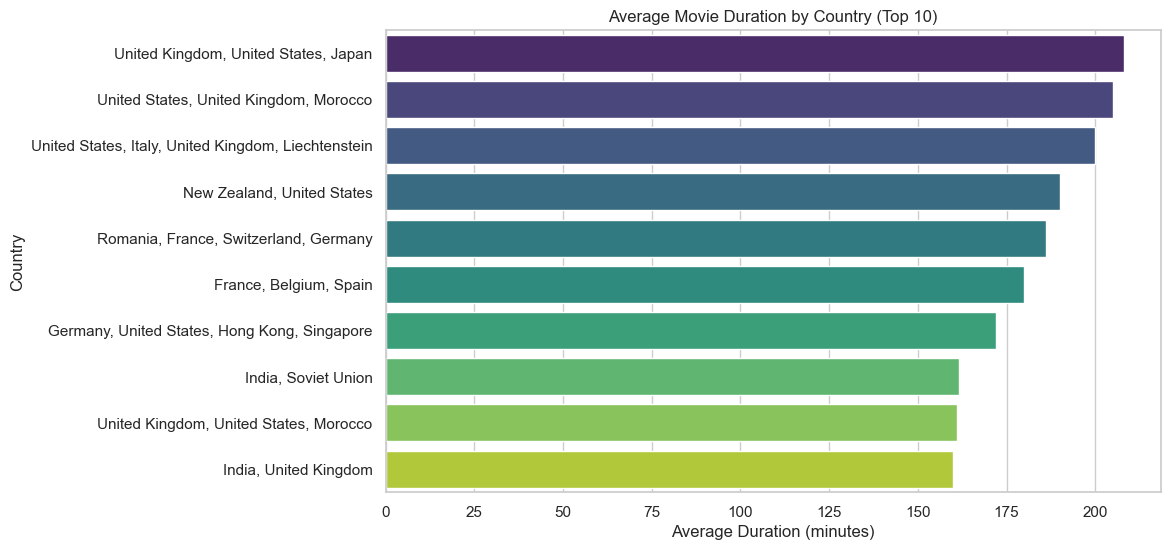

In [59]:

avg_duration = movies.groupby('country')['duration'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_duration.values, y=avg_duration.index, palette='viridis')
plt.title('Average Movie Duration by Country (Top 10)')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Country')
plt.show()


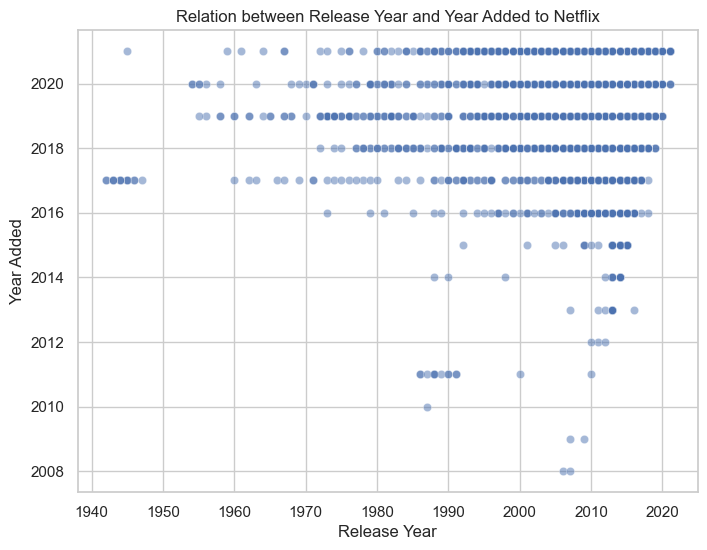

In [60]:

plt.figure(figsize=(8,6))
sns.scatterplot(x='release_year', y='year_added', data=df, alpha=0.5)
plt.title('Relation between Release Year and Year Added to Netflix')
plt.xlabel('Release Year')
plt.ylabel('Year Added')
plt.grid(True)
plt.show()


In [61]:

df.to_csv('cleaned_netflix_titles.csv', index=False)
print("✅ Cleaned dataset saved as 'cleaned_netflix_titles.csv'")


✅ Cleaned dataset saved as 'cleaned_netflix_titles.csv'


In [62]:

print("🎬 FINAL CONCLUSIONS:")
print("""
📈 Netflix has steadily expanded its global reach, especially after 2016.
🎥 Movies dominate the platform, but TV Shows have grown rapidly in recent years.
🌍 The U.S. remains the leading producer, followed by India and the U.K.
🕒 Most movies are 90–120 minutes, ideal for streaming audiences.
🔞 Majority of content is rated TV-MA or TV-14, suggesting adult-oriented themes.
🎭 The platform heavily invests in 'International Movies', 'Dramas', and 'Comedies'.
✨ Overall, Netflix's strategy focuses on diverse global content with short, engaging formats.
""")


🎬 FINAL CONCLUSIONS:

📈 Netflix has steadily expanded its global reach, especially after 2016.
🎥 Movies dominate the platform, but TV Shows have grown rapidly in recent years.
🌍 The U.S. remains the leading producer, followed by India and the U.K.
🕒 Most movies are 90–120 minutes, ideal for streaming audiences.
🔞 Majority of content is rated TV-MA or TV-14, suggesting adult-oriented themes.
🎭 The platform heavily invests in 'International Movies', 'Dramas', and 'Comedies'.
✨ Overall, Netflix's strategy focuses on diverse global content with short, engaging formats.



In [63]:

print("✅ Netflix Data Analysis Project Completed Successfully!\n")
print("📘 You can now present your insights in a report or dashboard (e.g., Power BI, Tableau, or Streamlit).")


✅ Netflix Data Analysis Project Completed Successfully!

📘 You can now present your insights in a report or dashboard (e.g., Power BI, Tableau, or Streamlit).
